# DATA: Police Arrests Made by the Chapel Hill Police Department since 2010 
## Proposal
Data Source Link:https://www.chapelhillopendata.org/explore/dataset/police-arrests-made/information/?sort=date_of_arrest

The Data is from Chapel Hill Open Data, A Chapel Hill Public Library Service.

The Publisher of this data is Town of Chapel Hill Police Department.

This dataset is licensed under: Open Database License (ODbL) which is free to use, re-use and redistribute — without any legal, technological or social restriction. #REF : https://okfn.org/opendata/

The Data was free to use and download (No Registration required).

I found this data in one of the links you provided with the tag 'Crime'.

I am analyzing this data to understand crime scenarios in the US.

Size of Data: 16254 rows x 17 columns, 2,652 KB

This table contains arrests made by the Chapel Hill Police Department.
(Multiple individuals may have been arrested under the same arrest number during related incidents or arrests.)

Data available since January 1, 2010 and updated quarterly.

The columns represent Incident Id, Primary Charge, Address, Date and Time of the arrest, Demographic Characteristics(Age, Race, Gender, Ethnicity), Type of arrest, Drugs or Alcohol Present(y/n), Weapon Present, Disposition(how the case resolved).

### Hypothesis:

1) More than 50% of the Data has incidents involving  Alcohol or Drugs.

Answer : Yes,the percentage of Incidents invloving Drugs or Alcohol is 58.6 % 


2) The people in the age group of 18 to 30 are involved more in crime than people in 30 to 50 age.

Answer : Yes,There are double the people involved in incidents of age 18 to 30 than the other if  people of age 18 to 30 account for half of the incidents.


## Primary Observation
The data contains crime incidents in North Carolina State.

The columns represent Incident Id, Primary Charge, Address, Date and Time of the arrest, Demographic Characteristics(Age, Race, Gender, Ethnicity), Type of arrest, Drugs or Alcohol Present(y/n/u), Weapon Present, Disposition(how the case resolved).

### Data Inconsistences :
Latitude_longitude column has two values which needs to be seperaterd into two columns 

Columns which are of integer type is Float and string is category value. 

Many NaN values in the Data.

# Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('https://www.chapelhillopendata.org/explore/dataset/police-arrests-made/download/?format=csv&timezone=America/New_York&lang=en&use_labels_for_header=true&csv_separator=%3B',delimiter=';')

# Describing the Data

In [3]:
df.head()

,Incident Id,Primary Charge,Street,City,State,Zipcode,Date of Arrest,Time of Arrest,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,latitude_longitude
0,40515,ASSAULT-SIMPLE,117 OLD DURHAM RD,CHAPEL HILL,NC,27517.0,2019-08-26,10:17 PM,25.0,W,F,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.94424056,-79.01174063"
1,40498,FAIL TO APPEAR/COMPL,214 W ROSEMARY ST,CHAPEL HILL,NC,27516.0,2019-08-26,8:51 AM,27.0,B,M,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,"35.913341985,-79.058293957"
2,40496,PUBLIC URINATION,107 EPHESUS CHURCH RD/LEGION RD,CHAPEL HILL,NC,27517.0,2019-08-26,8:15 PM,57.0,B,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,"35.935056,-79.0219395"
3,40497,AFFRAY/ASSAULT & BATTERY,117 OLD DURHAM RD,CHAPEL HILL,NC,27517.0,2019-08-26,10:17 PM,55.0,B,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.94424056,-79.01174063"
4,40495,ASSAULT-SIMPLE,233 MCCAULEY STREET,CHAPEL HILL,NC,27514.0,2019-08-26,7:27 AM,21.0,W,F,N,SUMMONED/CITED,N,UNARMED,CLEARED BY ARREST,"35.907198362,-79.057233541"


In [4]:
df.tail()

,Incident Id,Primary Charge,Street,City,State,Zipcode,Date of Arrest,Time of Arrest,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,latitude_longitude
16249,24072,UNDERAGE POSSESSION,2551 OWENS CT,CHAPEL HILL,NC,27514.0,2010-01-01,12:13 AM,19.0,W,M,NaN,ON VIEW,Y,UNARMED,ARREST/NO INVESTIGATION,"35.951177287,-79.027807612"
16250,24081,FAIL TO APPEAR/COMPL,405 PERRY CREEK DRIVE,CHAPEL HILL,NC,27516.0,2010-01-01,12:56 PM,18.0,W,F,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,ARREST/NO INVESTIGATION,"35.959746186,-79.020364172"
16251,24065,UNDERAGE POSSESSION,505 RED BUD RD,CHAPEL HILL,NC,27514.0,2010-01-01,12:24 AM,18.0,W,M,NaN,ON VIEW,Y,UNARMED,CLEARED BY ARREST,"35.950621974,-79.029413263"
16252,24082,RESISTING ARREST,110 NEW STATESIDE DR,CHAPEL HILL,NC,27516.0,2010-01-01,3:42 PM,27.0,W,M,N,ON VIEW,U,UNARMED,CLEARED BY ARREST,"35.955344973,-79.05981355"
16253,24080,FAIL TO APPEAR/COMPL,113 NORTH ESTES DRIVE,CHAPEL HILL,NC,27514.0,2010-01-01,7:52 AM,18.0,W,M,NaN,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,ARREST/NO INVESTIGATION,"35.930017667,-79.036681164"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16254 entries, 0 to 16253
Data columns (total 17 columns):
Incident Id                 16254 non-null int64
Primary Charge              16254 non-null object
Street                      16240 non-null object
City                        16206 non-null object
State                       16181 non-null object
Zipcode                     15366 non-null float64
Date of Arrest              16254 non-null object
Time of Arrest              16254 non-null object
Age                         15286 non-null float64
Race                        15285 non-null object
Gender                      15285 non-null object
Ethnicity                   11328 non-null object
Type of Arrest              16253 non-null object
Drugs or Alcohol Present    15905 non-null object
Weapon Present              16160 non-null object
Disposition                 16245 non-null object
latitude_longitude          16254 non-null object
dtypes: float64(2), int64(1), object(14)

In [6]:
print( 'Rows = ', df.shape[0] , ' Columns = ', df.shape[1] ) 

Rows =  16254  Columns =  17


In [7]:
df.isna().sum() # To check null values in Columns

Incident Id                    0
Primary Charge                 0
Street                        14
City                          48
State                         73
Zipcode                      888
Date of Arrest                 0
Time of Arrest                 0
Age                          968
Race                         969
Gender                       969
Ethnicity                   4926
Type of Arrest                 1
Drugs or Alcohol Present     349
Weapon Present                94
Disposition                    9
latitude_longitude             0
dtype: int64

In [8]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

Ethnicity                   0.303064
Gender                      0.059616
Race                        0.059616
Age                         0.059555
Zipcode                     0.054633
Drugs or Alcohol Present    0.021472
Weapon Present              0.005783
State                       0.004491
City                        0.002953
Street                      0.000861
Disposition                 0.000554
Type of Arrest              0.000062
Primary Charge              0.000000
latitude_longitude          0.000000
Date of Arrest              0.000000
Time of Arrest              0.000000
Incident Id                 0.000000
dtype: float64

In [9]:
df.columns

Index(['Incident Id', 'Primary Charge', 'Street', 'City', 'State', 'Zipcode',
       'Date of Arrest', 'Time of Arrest', 'Age', 'Race', 'Gender',
       'Ethnicity', 'Type of Arrest', 'Drugs or Alcohol Present',
       'Weapon Present', 'Disposition', 'latitude_longitude'],
      dtype='object')

# Cleaning the Data

In [10]:
df[df.duplicated()].shape[0]        #Checking Duplicate Data 

0

In [11]:
df[df.duplicated( [ 'Incident Id' ]) ]   #No repeated incident ID

,Incident Id,Primary Charge,Street,City,State,Zipcode,Date of Arrest,Time of Arrest,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,latitude_longitude


Dropping State Column

In [12]:
df.drop( columns = 'State' , inplace=True ) # Dropping State Column as it only contains one unique value 'NC' 

#To edit the original DataFrame, the “inplace” parameter can be set to True, and there is no returned value.

As latitude_longitude column has 2 fields,we are Splitting it into two columns - Latitude and Longitude

In [13]:
df[[ 'Latitude' , 'Longitude' ]] = df[ 'latitude_longitude' ].str.split( ',' ,  expand=True )      # n=1 : for only 1 seperation 

Merging date and time

In [14]:
df[ 'Date and Time of Arrest' ] = df[ 'Date of Arrest' ].str.cat(df[ 'Time of Arrest' ], sep=" ")  #  Concatenating  date and time

In [15]:
df[ 'Date and Time of Arrest' ] =  pd.to_datetime( df[ 'Date and Time of Arrest' ] ) # Converting object to datetime datatype

In [16]:
df.drop( columns = [ 'Date of Arrest','Time of Arrest','latitude_longitude'] , inplace=True )  #Dropping columns

In [17]:
df.dtypes

Incident Id                          int64
Primary Charge                      object
Street                              object
City                                object
Zipcode                            float64
Age                                float64
Race                                object
Gender                              object
Ethnicity                           object
Type of Arrest                      object
Drugs or Alcohol Present            object
Weapon Present                      object
Disposition                         object
Latitude                            object
Longitude                           object
Date and Time of Arrest     datetime64[ns]
dtype: object

In [18]:
df[ 'Latitude' ] = df[ 'Latitude' ].astype(float)  

In [19]:
df[ 'Longitude' ] = df[ 'Longitude'  ].astype(float)

In [20]:
df.head()

,Incident Id,Primary Charge,Street,City,Zipcode,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,Latitude,Longitude,Date and Time of Arrest
0,40515,ASSAULT-SIMPLE,117 OLD DURHAM RD,CHAPEL HILL,27517.0,25.0,W,F,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.944241,-79.011741,2019-08-26 22:17:00
1,40498,FAIL TO APPEAR/COMPL,214 W ROSEMARY ST,CHAPEL HILL,27516.0,27.0,B,M,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,35.913342,-79.058294,2019-08-26 08:51:00
2,40496,PUBLIC URINATION,107 EPHESUS CHURCH RD/LEGION RD,CHAPEL HILL,27517.0,57.0,B,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,35.935056,-79.021940,2019-08-26 20:15:00
3,40497,AFFRAY/ASSAULT & BATTERY,117 OLD DURHAM RD,CHAPEL HILL,27517.0,55.0,B,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.944241,-79.011741,2019-08-26 22:17:00
4,40495,ASSAULT-SIMPLE,233 MCCAULEY STREET,CHAPEL HILL,27514.0,21.0,W,F,N,SUMMONED/CITED,N,UNARMED,CLEARED BY ARREST,35.907198,-79.057234,2019-08-26 07:27:00


In [21]:
df.describe(include=object)

,Primary Charge,Street,City,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition
count,16254,16240,16206,15285,15285,11328,16253,15905,16160,16245
unique,1188,5861,34,7,2,3,3,3,7,2
top,FAIL TO APPEAR/COMPL,828 MARTIN LUTHER KING JR BLVD,CHAPEL HILL,W,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST
freq,1687,588,15832,7425,12265,10356,5983,9249,15940,14837


In [22]:
gender=df['Gender'].unique().tolist()

In [23]:
print('Unique elements in Gender',gender)

Unique elements in Gender ['F', 'M', nan]


In [24]:
print('Unique elements in Race',df['Race'].unique().tolist())

Unique elements in Race ['W', 'B', 'U', 'A', nan, 'O', 'H', 'I']


In [25]:
print('Unique elements in Ethnicity',df['Race'].unique().tolist())

Unique elements in Ethnicity ['W', 'B', 'U', 'A', nan, 'O', 'H', 'I']


In [26]:
weapon=df['Weapon Present'].unique().tolist()

In [27]:
print('Unique elements in Weapon Present',weapon)

Unique elements in Weapon Present ['UNARMED', nan, 'HANDGUN', 'LETHAL CUTTING INSTRUMENT', 'CLUB/BLACKJACK/BRASS KNUCKLES', 'SHOTGUN', 'FIREARM (TYP NOT STATED)', 'RIFLE']


In [28]:
df['Race'] = pd.Categorical(df.Race)
df['Gender'] = pd.Categorical(df.Gender)
df['Ethnicity'] = pd.Categorical(df.Ethnicity)
df['Type of Arrest'] = pd.Categorical(df['Type of Arrest'])
df['Drugs or Alcohol Present'] = pd.Categorical(df['Drugs or Alcohol Present'])
df['Weapon Present'] = pd.Categorical(df['Weapon Present'])

df['Disposition'] = pd.Categorical(df['Disposition'])

df.dtypes

Incident Id                          int64
Primary Charge                      object
Street                              object
City                                object
Zipcode                            float64
Age                                float64
Race                              category
Gender                            category
Ethnicity                         category
Type of Arrest                    category
Drugs or Alcohol Present          category
Weapon Present                    category
Disposition                       category
Latitude                           float64
Longitude                          float64
Date and Time of Arrest     datetime64[ns]
dtype: object

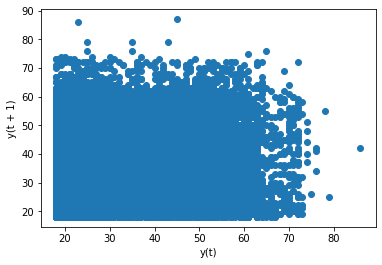

In [29]:
pd.plotting.lag_plot(df.Age)  #Lag Plot for Age Column to check for patterns in missing values 

No Pattern found in missing data so dropping null rows from 'Age' and 'Drugs or Alcohol Present' Columns

In [30]:
df.dropna(subset=['Age', 'Drugs or Alcohol Present'],inplace=True)

In [31]:
df[ 'Age' ] = df[ 'Age' ].astype(int)

In [32]:
df.head()

,Incident Id,Primary Charge,Street,City,Zipcode,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,Latitude,Longitude,Date and Time of Arrest
0,40515,ASSAULT-SIMPLE,117 OLD DURHAM RD,CHAPEL HILL,27517.0,25,W,F,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.944241,-79.011741,2019-08-26 22:17:00
1,40498,FAIL TO APPEAR/COMPL,214 W ROSEMARY ST,CHAPEL HILL,27516.0,27,B,M,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,35.913342,-79.058294,2019-08-26 08:51:00
2,40496,PUBLIC URINATION,107 EPHESUS CHURCH RD/LEGION RD,CHAPEL HILL,27517.0,57,B,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,35.935056,-79.021940,2019-08-26 20:15:00
3,40497,AFFRAY/ASSAULT & BATTERY,117 OLD DURHAM RD,CHAPEL HILL,27517.0,55,B,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.944241,-79.011741,2019-08-26 22:17:00
4,40495,ASSAULT-SIMPLE,233 MCCAULEY STREET,CHAPEL HILL,27514.0,21,W,F,N,SUMMONED/CITED,N,UNARMED,CLEARED BY ARREST,35.907198,-79.057234,2019-08-26 07:27:00


In [33]:
df.isna().sum()

Incident Id                    0
Primary Charge                 0
Street                         9
City                          44
Zipcode                      797
Age                            0
Race                           1
Gender                         1
Ethnicity                   3841
Type of Arrest                 1
Drugs or Alcohol Present       0
Weapon Present                84
Disposition                    8
Latitude                       0
Longitude                      0
Date and Time of Arrest        0
dtype: int64

In [34]:
df[df.Gender.isna()]

,Incident Id,Primary Charge,Street,City,Zipcode,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,Latitude,Longitude,Date and Time of Arrest
12419,27962,POSS FRAUDULENT ID,137 E ROSEMARY ST,CHAPEL HILL,27514.0,18,NaN,NaN,NaN,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.914697,-79.05484,2012-01-13 01:17:00


In [35]:
df.describe()

,Incident Id,Zipcode,Age,Latitude,Longitude
count,14982.000000,14185.000000,14982.000000,14982.000000,14982.000000
mean,32470.523228,27577.457455,34.523361,35.910172,-79.096226
std,4720.359411,3974.107085,13.862401,0.853551,1.685364
min,24065.000000,2716.000000,18.000000,-14.323897,-170.768523
25%,28437.250000,27514.000000,22.000000,35.912862,-79.058924
50%,32541.500000,27514.000000,30.000000,35.914838,-79.055026
75%,36552.750000,27516.000000,46.000000,35.929737,-79.046075
max,40517.000000,277514.000000,87.000000,45.924300,-73.652630


Age is within range of 18 to 87.

ZipCode seems to be incorrect.

In [36]:
sdf = df.dropna( subset = ['Zipcode'] )
sdf = sdf.sort_values( by = 'Zipcode' )
sdf.head()

,Incident Id,Primary Charge,Street,City,Zipcode,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,Latitude,Longitude,Date and Time of Arrest
513,39988,DAMAGE-REAL PROPERTY,ISLEY ST//N COLUMBIA ST,CHAPEL HILL,2716.0,39,W,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,35.918460,-79.059042,2019-04-14 03:57:00
12657,27721,HARASSING PHONE CALLS,BANKS DR AT WEAVER DAIRY RD,CHAPEL HILL,21514.0,26,W,M,H,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,35.963955,-79.055680,2011-11-18 21:32:00
5132,35327,ASSAULT BY STRANGULATION,10520 JUDICIAL DR,FAIRFAX VA,22030.0,22,W,M,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,38.843619,-77.311383,2016-03-13 13:00:00
11214,29197,OPEN CONTAINER,ISLEY ST AND N COLUMBIA ST,CHAPEL HILL,24514.0,27,W,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,35.918460,-79.059042,2012-09-22 15:34:00
1398,39089,ASSAULT W DEADLY WEAPON,1116 15 501 S,CHAPEL HILL,25517.0,74,B,M,N,ON VIEW,N,UNARMED,CLEARED BY ARREST,35.880246,-79.062977,2018-08-09 05:08:00


In [37]:
sdf.tail()

,Incident Id,Primary Charge,Street,City,Zipcode,Age,Race,Gender,Ethnicity,Type of Arrest,Drugs or Alcohol Present,Weapon Present,Disposition,Latitude,Longitude,Date and Time of Arrest
3989,36483,RAPE 1ST DEGREE,105 N FLORECE ST,MAXTON,28364.0,37,B,M,N,ON VIEW,N,UNARMED,CLEARED BY ARREST,34.736593,-79.351060,2016-10-31 12:20:00
3222,37254,PUBLIC CONSUMPTION,1800 MARTIN LUTHER KING JR BLVD,CHAPEL HILL,227514.0,56,B,M,N,SUMMONED/CITED,Y,UNARMED,CLEARED BY ARREST,35.968230,-79.058646,2017-05-12 14:55:00
6884,33576,FRAUD-OBT PROPERTY,110 E MAIN STREET,CARRBORO,271510.0,47,B,M,N,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,CLEARED BY ARREST,35.910439,-79.070957,2015-04-08 14:35:00
10684,29733,FAIL TO APPEAR/COMPL,NC 86/TIMBER HOLLOW CT,CHAPEL HILL,275144.0,28,W,M,NaN,TAKEN INTO CUSTODY (WARRANT/LP),N,UNARMED,ARREST/NO INVESTIGATION,35.941572,-79.057431,2013-02-01 21:28:00
3849,36625,IMPAIRED DRIVING DWI,FORDHAM BLVD/ELLIOTT RD,CHAPEL HILL,277514.0,25,B,F,NaN,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.932473,-79.024010,2016-12-09 16:50:00


In [38]:
correctzip={ 2716:27516 , 227514:27514 , 275144:27514 , 277514:27514 , 271510:27510 } #Replacing incorrect zipcodes with correct values from google

In [39]:
df[ 'Zipcode' ]=df[ 'Zipcode' ].replace(correctzip)

In [40]:
df[ 'Zipcode' ] = df[ 'Zipcode' ].astype('Int32')

In [41]:
df.describe(include='object')

,Primary Charge,Street,City
count,14982,14973,14938
unique,1127,5508,34
top,FAIL TO APPEAR/COMPL,828 MARTIN LUTHER KING JR BLVD,CHAPEL HILL
freq,1631,500,14590


In [42]:
df.dtypes 

Incident Id                          int64
Primary Charge                      object
Street                              object
City                                object
Zipcode                              Int32
Age                                  int32
Race                              category
Gender                            category
Ethnicity                         category
Type of Arrest                    category
Drugs or Alcohol Present          category
Weapon Present                    category
Disposition                       category
Latitude                           float64
Longitude                          float64
Date and Time of Arrest     datetime64[ns]
dtype: object

In [43]:
df.isna().sum()

Incident Id                    0
Primary Charge                 0
Street                         9
City                          44
Zipcode                      797
Age                            0
Race                           1
Gender                         1
Ethnicity                   3841
Type of Arrest                 1
Drugs or Alcohol Present       0
Weapon Present                84
Disposition                    8
Latitude                       0
Longitude                      0
Date and Time of Arrest        0
dtype: int64

## Hypothesis 1 : More than 50% of the Data has incidents involving  Alcohol or Drugs.

In [44]:
keys=df['Drugs or Alcohol Present'].unique().tolist()   #all unique elements from the column

In [45]:
keys

['Y', 'N', 'U']

In [46]:
one={}  # Dictionary to store results

for x in keys:    # Intialising the dictionary
    one[x]=0

all=df['Drugs or Alcohol Present'].tolist()  #all elements from the column

for x in all:    #Iterating over list to count incidents
    one[x]+=1

In [47]:
one

{'Y': 8781, 'N': 4572, 'U': 1629}

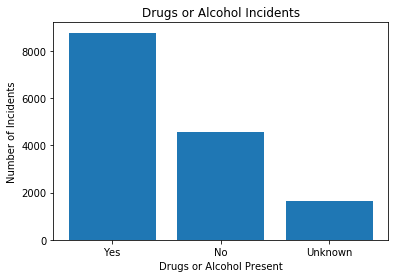

In [48]:
plt.bar(['Yes','No','Unknown'],one.values())
_=plt.xlabel( 'Drugs or Alcohol Present' )
_=plt.ylabel( 'Number of Incidents' )
_=plt.title( 'Drugs or Alcohol Incidents' )


In [49]:
print('Percentage of Incidents invloving Drugs or Alcohol = ',(one['Y']/df.shape[0])*100,'%')

Percentage of Incidents invloving Drugs or Alcohol =  58.610332398878654 %


## Hypothesis 2 : The people in the age group of 18 to 30 are involved more in crime than people in 31 to 50 age.

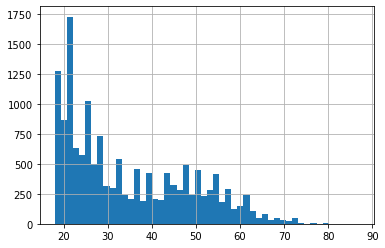

In [50]:
df.Age.hist(bins =50)

In [51]:
allage=df['Age'].tolist()
teen = 0
old = 0
for x in allage:
        if x>=18 and x<=30 :
            teen+=1
        if x>30 and x<=50 :
            old+=1

In [52]:
teen

7648

In [53]:
old

4731

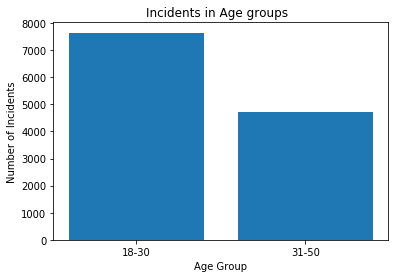

In [54]:
plt.bar(['18-30','31-50'],[teen,old])
_=plt.xlabel( 'Age Group' )
_=plt.ylabel( 'Number of Incidents' )
_=plt.title( 'Incidents in Age groups  ' )


In [55]:
print('Percentage of Incidents involving people of age 18 to 30 is',(teen/(teen+old) ),'%')

Percentage of Incidents involving people of age 18 to 30 is 0.6178205024638501 %


In [56]:
print('Percentage of Incidents involving people of age 18 to 30 is',old/teen,'%')

Percentage of Incidents involving people of age 18 to 30 is 0.6185930962343096 %


## Documentation on cleaning and tidying


Analysis :
The Zipcode column is now correct (5 digits). 
The latitude and longitude was converted from object to float.